Q.No.1: Generate the sample size using the provided details.



In [18]:

import pandas as pd
import math

# Load the dataset
file_path = "C:\\Users\\Sageer Ansari\\OneDrive\\Desktop\\NLP\\Team-10.xlsx"

df = pd.read_excel(file_path, sheet_name='Team 10', skiprows=2)

# Clean the dataset
df.columns = [
    'Sl.no.', 'Name', 'Age', 'Gender', 'Class',
    'Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)', 'NaN1', 'NaN2'
]
df = df[['Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']]
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna().reset_index(drop=True)

# Constants for Team-10
z_alpha_2 = 2.58  # 99% confidence
sigma = 10
E = 4
N = len(df)  # Population size

# Calculate sample size without correction
n0 = ((z_alpha_2 * sigma) / E) ** 2

# Apply finite population correction
n = n0 / (1 + ((n0 - 1) / N))

# Print results
print(f"Population size (N): {N}")
print(f"Sample size without correction (n0): {n0:.2f}")
print(f"Corrected sample size (n): {math.ceil(n)}")  # Round up to nearest whole number


Population size (N): 910
Sample size without correction (n0): 41.60
Corrected sample size (n): 40


Q.NO:2 Select a sample (Minimum 5) of size '𝑛’ (found in above
       step) from population by any one type of probability
       sampling (random, cluster, stratified, systematic).

In [28]:
import pandas as pd
import numpy as np

# File path
file_path = "C:\\Users\\Sageer Ansari\\OneDrive\\Desktop\\NLP\\Team-10.xlsx"

# Load dataset
df = pd.read_excel(file_path, sheet_name='Team 10', skiprows=2)

# Rename and select relevant columns
df.columns = [
    'Sl.no.', 'Name', 'Age', 'Gender', 'Class',
    'Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)', 'NaN1', 'NaN2'
]
df = df[['Name', 'Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']]

# Convert numeric columns properly (fixing that stupid subset error)
df['Study Hours (per week)'] = pd.to_numeric(df['Study Hours (per week)'], errors='coerce')
df['Marks (out of 100)'] = pd.to_numeric(df['Marks (out of 100)'], errors='coerce')
df['Attendance (%)'] = pd.to_numeric(df['Attendance (%)'], errors='coerce')

# Drop missing rows and reset index
df = df.dropna().reset_index(drop=True)

# Sample parameters
n = 40  # Sample size
num_samples = 5  # Number of samples to generate

# Generate 5 random samples
samples = [df.sample(n=n, random_state=i) for i in range(num_samples)]

# Store samples in separate variables
sample1, sample2, sample3, sample4, sample5 = samples

# Styling (optional, for notebook display)
style = [
    {'selector': 'table', 'props': [('background-color', 'white')]},
    {'selector': 'th, td', 'props': [('color', 'black'), ('border', '1px solid black')]},
    {'selector': 'th', 'props': [('background-color', '#f8f8f8')]},
]

# Display first 6 entries from each sample
for i, sample in enumerate(samples, 1):
    print(f"\nSample {i} (First 6 of {n} Students)")
    print("="*50)
    display(sample.head(6).style
            .format({'Marks (out of 100)': '{:.1f}', 'Attendance (%)': '{:.1f}%'})
            .set_table_styles(style)
            .set_properties(**{'background-color': 'white', 'color': 'black'}))



Sample 1 (First 6 of 40 Students)


,Name,Study Hours (per week),Marks (out of 100),Attendance (%)
251,Qasim,13.000000,82.0,96.0%
726,Yousuf,13.000000,76.0,88.0%
293,Javeria,16.000000,81.0,97.0%
614,Waleed,18.000000,89.0,96.0%
144,Imran,13.000000,87.0,86.0%
267,Laiba,9.000000,75.0,88.0%



Sample 2 (First 6 of 40 Students)


,Name,Study Hours (per week),Marks (out of 100),Attendance (%)
191,Danish,11.000000,75.0,81.0%
882,Vaneeza,13.000000,74.0,79.0%
111,Zara,5.000000,84.0,86.0%
262,Nadia,15.000000,91.0,83.0%
669,Tania,11.000000,92.0,90.0%
830,Laiba,16.000000,85.0,91.0%



Sample 3 (First 6 of 40 Students)


,Name,Study Hours (per week),Marks (out of 100),Attendance (%)
892,Javeria,16.000000,77.0,91.0%
382,Pari,11.000000,84.0,87.0%
15,Yousuf,16.000000,72.0,93.0%
460,Usman,7.000000,78.0,98.0%
722,Yousuf,15.000000,85.0,100.0%
101,Ayesha,16.000000,86.0,92.0%



Sample 4 (First 6 of 40 Students)


,Name,Study Hours (per week),Marks (out of 100),Attendance (%)
863,Waleed,9.000000,83.0,88.0%
743,Kashif,11.000000,87.0,96.0%
839,Nadia,14.000000,79.0,75.0%
787,Ahmed,19.000000,78.0,81.0%
549,Javeria,13.000000,71.0,100.0%
630,Yousuf,13.000000,76.0,82.0%



Sample 5 (First 6 of 40 Students)


,Name,Study Hours (per week),Marks (out of 100),Attendance (%)
289,Danish,15.000000,92.0,85.0%
239,Clara,12.000000,78.0,77.0%
816,Emaan,16.000000,88.0,86.0%
76,Danish,13.000000,85.0,81.0%
92,Eshal,18.000000,79.0,86.0%
758,Zara,14.000000,82.0,83.0%


Q.NO:3 Calculate the Mean and Standard Deviation (S.D.) of each
sample.

In [29]:
# Q3: Calculate Mean and Standard Deviation of Each Sample
summary_data = []
for i, sample in enumerate([sample1, sample2, sample3, sample4, sample5], 1):
    means = sample.mean(numeric_only=True)
    stds = sample.std(numeric_only=True)
    summary_data.append([f"Sample {i}"] + means.tolist() + stds.tolist())

# Create summary DataFrame for means and standard deviations
columns = ['Sample', 'Mean Study Hours', 'Mean Marks', 'Mean Attendance', 
           'SD Study Hours', 'SD Marks', 'SD Attendance']
summary_df = pd.DataFrame(summary_data, columns=columns)

# Display the summary stats
print("\nQ3: Mean and Standard Deviation of Each Sample:")
print("="*50)
print(summary_df)



Q3: Mean and Standard Deviation of Each Sample:
     Sample  Mean Study Hours  Mean Marks  Mean Attendance  SD Study Hours  \
0  Sample 1            13.950      77.850           86.600        2.881862   
1  Sample 2            13.325      79.800           87.125        3.189627   
2  Sample 3            13.100      76.675           87.100        3.280088   
3  Sample 4            13.400      76.625           86.900        2.968208   
4  Sample 5            14.125      76.075           87.650        2.623244   

    SD Marks  SD Attendance  
0  10.608536       7.413778  
1   9.907780       5.698347  
2  10.637108       6.860515  
3  10.284884       7.228150  
4  10.936618       5.753706  


Q.NO:4 Determine the sampling distribution of the sample
means.

In [42]:
# Number of simulations (resamples)
num_resamples = 1000

# Store resampled means for each sample
resampled_means_sample1 = []
resampled_means_sample2 = []
resampled_means_sample3 = []
resampled_means_sample4 = []
resampled_means_sample5 = []

# Perform bootstrap resampling for each of the 5 samples
for _ in range(num_resamples):
    # Sample 1
    resampled_sample1 = sample1.sample(n=n, replace=True)
    resampled_means_sample1.append(resampled_sample1[['Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']].mean())
    
    # Sample 2
    resampled_sample2 = sample2.sample(n=n, replace=True)
    resampled_means_sample2.append(resampled_sample2[['Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']].mean())
    
    # Sample 3
    resampled_sample3 = sample3.sample(n=n, replace=True)
    resampled_means_sample3.append(resampled_sample3[['Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']].mean())
    
    # Sample 4
    resampled_sample4 = sample4.sample(n=n, replace=True)
    resampled_means_sample4.append(resampled_sample4[['Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']].mean())
    
    # Sample 5
    resampled_sample5 = sample5.sample(n=n, replace=True)
    resampled_means_sample5.append(resampled_sample5[['Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']].mean())

# Convert to DataFrame for each sample
resampled_distribution_sample1 = pd.DataFrame(resampled_means_sample1)
resampled_distribution_sample2 = pd.DataFrame(resampled_means_sample2)
resampled_distribution_sample3 = pd.DataFrame(resampled_means_sample3)
resampled_distribution_sample4 = pd.DataFrame(resampled_means_sample4)
resampled_distribution_sample5 = pd.DataFrame(resampled_means_sample5)

# Display basic stats for each sample's resampled distribution
print("Sample 1 Resampled Distribution Stats:")
print(resampled_distribution_sample1.describe())

print("\nSample 2 Resampled Distribution Stats:")
print(resampled_distribution_sample2.describe())

print("\nSample 3 Resampled Distribution Stats:")
print(resampled_distribution_sample3.describe())

print("\nSample 4 Resampled Distribution Stats:")
print(resampled_distribution_sample4.describe())

print("\nSample 5 Resampled Distribution Stats:")
print(resampled_distribution_sample5.describe())


Sample 1 Resampled Distribution Stats:
       Study Hours (per week)  Marks (out of 100)  Attendance (%)
count              1000.00000         1000.000000     1000.000000
mean                 13.92720           77.861975       86.608275
std                   0.44546            1.678811        1.128679
min                  12.52500           73.250000       82.775000
25%                  13.62500           76.750000       85.825000
50%                  13.92500           77.825000       86.650000
75%                  14.25000           78.975000       87.406250
max                  15.27500           83.875000       90.425000

Sample 2 Resampled Distribution Stats:
       Study Hours (per week)  Marks (out of 100)  Attendance (%)
count             1000.000000         1000.000000     1000.000000
mean                13.301425           79.803125       87.135000
std                  0.496505            1.545623        0.913334
min                 11.850000           74.050000       84.3000

Q.NO:5 Plot the sampling distribution.

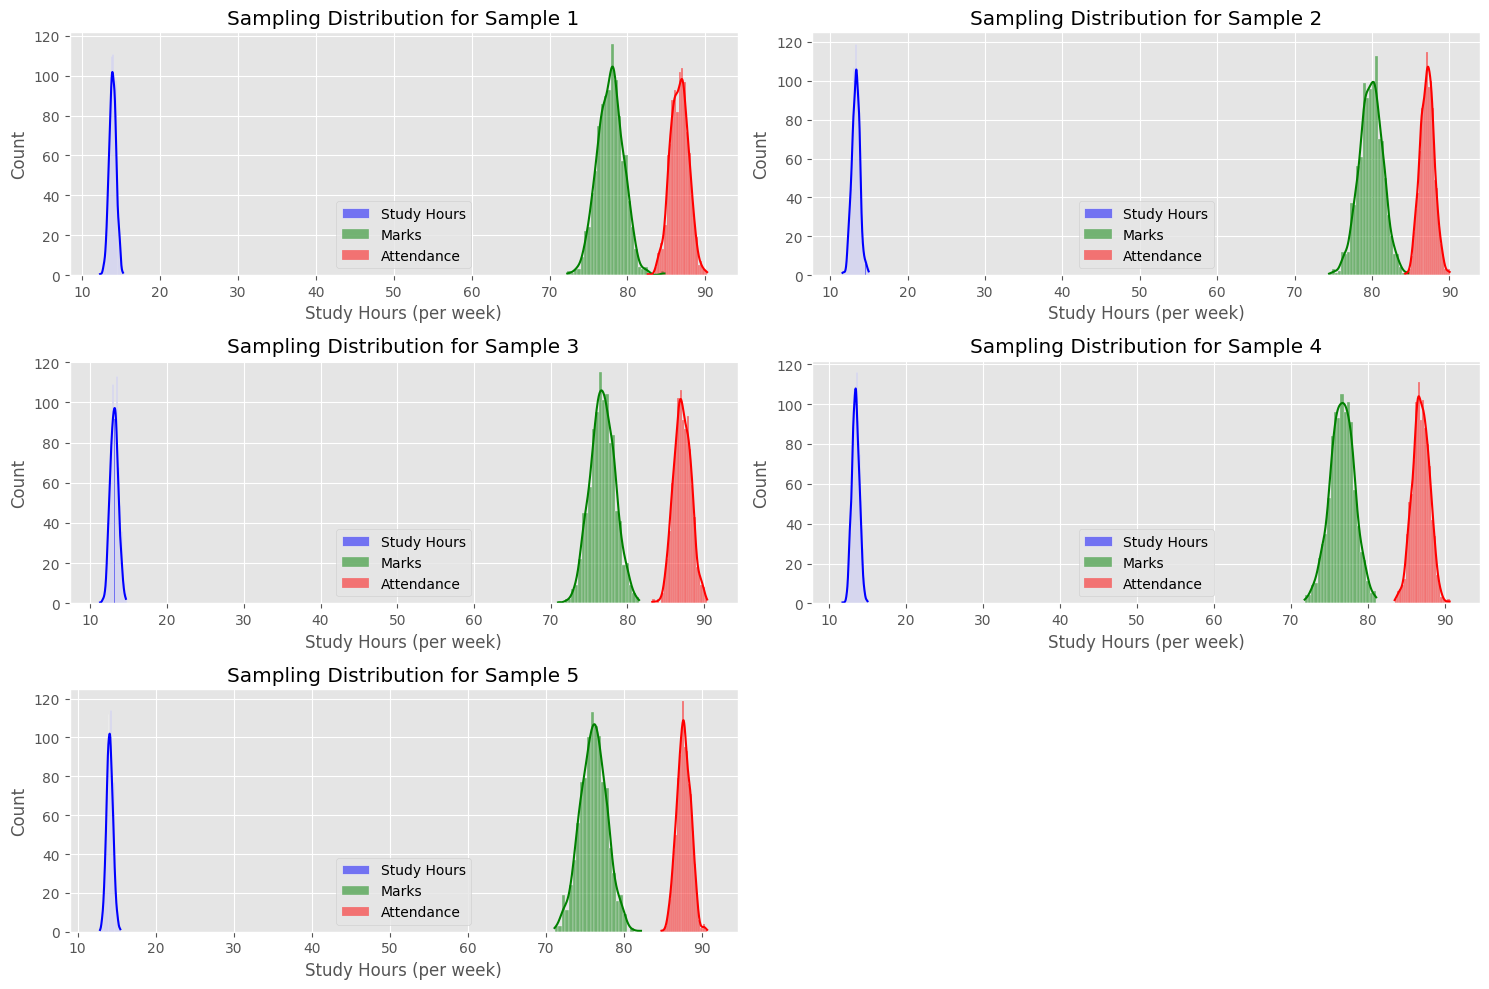

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of simulations (resamples)
num_resamples = 1000

# Store resampled means for each sample
resampled_means_sample1 = []
resampled_means_sample2 = []
resampled_means_sample3 = []
resampled_means_sample4 = []
resampled_means_sample5 = []

# Perform bootstrap resampling for each of the 5 samples
for _ in range(num_resamples):
    # Sample 1
    resampled_sample1 = sample1.sample(n=n, replace=True)
    resampled_means_sample1.append(resampled_sample1[['Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']].mean())
    
    # Sample 2
    resampled_sample2 = sample2.sample(n=n, replace=True)
    resampled_means_sample2.append(resampled_sample2[['Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']].mean())
    
    # Sample 3
    resampled_sample3 = sample3.sample(n=n, replace=True)
    resampled_means_sample3.append(resampled_sample3[['Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']].mean())
    
    # Sample 4
    resampled_sample4 = sample4.sample(n=n, replace=True)
    resampled_means_sample4.append(resampled_sample4[['Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']].mean())
    
    # Sample 5
    resampled_sample5 = sample5.sample(n=n, replace=True)
    resampled_means_sample5.append(resampled_sample5[['Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']].mean())

# Convert to DataFrame for each sample
resampled_distribution_sample1 = pd.DataFrame(resampled_means_sample1)
resampled_distribution_sample2 = pd.DataFrame(resampled_means_sample2)
resampled_distribution_sample3 = pd.DataFrame(resampled_means_sample3)
resampled_distribution_sample4 = pd.DataFrame(resampled_means_sample4)
resampled_distribution_sample5 = pd.DataFrame(resampled_means_sample5)

# Plotting all 5 sampling distributions
plt.figure(figsize=(15, 10))

# Plot for Sample 1
plt.subplot(3, 2, 1)
sns.histplot(resampled_distribution_sample1['Study Hours (per week)'], kde=True, color='blue', label='Study Hours')
sns.histplot(resampled_distribution_sample1['Marks (out of 100)'], kde=True, color='green', label='Marks')
sns.histplot(resampled_distribution_sample1['Attendance (%)'], kde=True, color='red', label='Attendance')
plt.title("Sampling Distribution for Sample 1")
plt.legend()

# Plot for Sample 2
plt.subplot(3, 2, 2)
sns.histplot(resampled_distribution_sample2['Study Hours (per week)'], kde=True, color='blue', label='Study Hours')
sns.histplot(resampled_distribution_sample2['Marks (out of 100)'], kde=True, color='green', label='Marks')
sns.histplot(resampled_distribution_sample2['Attendance (%)'], kde=True, color='red', label='Attendance')
plt.title("Sampling Distribution for Sample 2")
plt.legend()

# Plot for Sample 3
plt.subplot(3, 2, 3)
sns.histplot(resampled_distribution_sample3['Study Hours (per week)'], kde=True, color='blue', label='Study Hours')
sns.histplot(resampled_distribution_sample3['Marks (out of 100)'], kde=True, color='green', label='Marks')
sns.histplot(resampled_distribution_sample3['Attendance (%)'], kde=True, color='red', label='Attendance')
plt.title("Sampling Distribution for Sample 3")
plt.legend()

# Plot for Sample 4
plt.subplot(3, 2, 4)
sns.histplot(resampled_distribution_sample4['Study Hours (per week)'], kde=True, color='blue', label='Study Hours')
sns.histplot(resampled_distribution_sample4['Marks (out of 100)'], kde=True, color='green', label='Marks')
sns.histplot(resampled_distribution_sample4['Attendance (%)'], kde=True, color='red', label='Attendance')
plt.title("Sampling Distribution for Sample 4")
plt.legend()

# Plot for Sample 5
plt.subplot(3, 2, 5)
sns.histplot(resampled_distribution_sample5['Study Hours (per week)'], kde=True, color='blue', label='Study Hours')
sns.histplot(resampled_distribution_sample5['Marks (out of 100)'], kde=True, color='green', label='Marks')
sns.histplot(resampled_distribution_sample5['Attendance (%)'], kde=True, color='red', label='Attendance')
plt.title("Sampling Distribution for Sample 5")
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Q.NO:6 Frame a null hypothesis for the equivalence of means (i.e.,
H0: μ = μ0 and H1: μ≠μ0).

In [50]:
import pandas as pd
import numpy as np


# Calculate the population mean for Marks
population_mean = df['Marks (out of 100)'].mean()

# Sample 5 different random samples (or use the specific samples you have)
sample1 = df.sample(n=5, replace=True)
sample2 = df.sample(n=5, replace=True)
sample3 = df.sample(n=5, replace=True)
sample4 = df.sample(n=5, replace=True)
sample5 = df.sample(n=5, replace=True)

# List of samples
samples = [sample1, sample2, sample3, sample4, sample5]

# Loop through each sample to calculate the sample mean and test the hypothesis
for i, sample in enumerate(samples, start=1):
    # Calculate the sample mean for Marks
    sample_mean = sample['Marks (out of 100)'].mean()

    # Print the hypothesis setup for each sample
    print(f"\nQ6: Hypothesis Setup for Sample {i}")
    print("Null Hypothesis (H0): The population mean (μ) equals the sample mean (x̄)")
    print("Alternative Hypothesis (H1): The population mean (μ) does NOT equal the sample mean (x̄)")
    print(f"Population Mean (μ0): {population_mean:.2f}")
    print(f"Sample {i} Mean (x̄): {sample_mean:.2f}")

    # You can use a t-test for comparing means if needed
    t_stat, p_value = stats.ttest_1samp(sample['Marks (out of 100)'], population_mean)
    
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    
    # Conclusion based on p-value
    if p_value < 0.05:
        print("Reject the Null Hypothesis: The sample mean is significantly different from the population mean.")
    else:
        print("Fail to reject the Null Hypothesis: The sample mean is not significantly different from the population mean.")



Q6: Hypothesis Setup for Sample 1
Null Hypothesis (H0): The population mean (μ) equals the sample mean (x̄)
Alternative Hypothesis (H1): The population mean (μ) does NOT equal the sample mean (x̄)
Population Mean (μ0): 77.31
Sample 1 Mean (x̄): 77.60
T-statistic: 0.06
P-value: 0.9522
Fail to reject the Null Hypothesis: The sample mean is not significantly different from the population mean.

Q6: Hypothesis Setup for Sample 2
Null Hypothesis (H0): The population mean (μ) equals the sample mean (x̄)
Alternative Hypothesis (H1): The population mean (μ) does NOT equal the sample mean (x̄)
Population Mean (μ0): 77.31
Sample 2 Mean (x̄): 78.40
T-statistic: 0.26
P-value: 0.8107
Fail to reject the Null Hypothesis: The sample mean is not significantly different from the population mean.

Q6: Hypothesis Setup for Sample 3
Null Hypothesis (H0): The population mean (μ) equals the sample mean (x̄)
Alternative Hypothesis (H1): The population mean (μ) does NOT equal the sample mean (x̄)
Population M

Q.NO:7 Test the hypothesis at 5% and 1% significance levels to
determine if there is a difference between population and
sampling mean.

In [51]:
import pandas as pd
import numpy as np
from scipy import stats  # Import stats from scipy for t-test

# Assuming 'df' is your DataFrame containing the data
# and you're randomly sampling from it
# (Make sure to define df first, e.g. df = pd.read_csv('your_file.csv'))

# Calculate the population mean for Marks
population_mean = df['Marks (out of 100)'].mean()

# Sample 5 different random samples (or use the specific samples you have)
sample1 = df.sample(n=5, replace=True)
sample2 = df.sample(n=5, replace=True)
sample3 = df.sample(n=5, replace=True)
sample4 = df.sample(n=5, replace=True)
sample5 = df.sample(n=5, replace=True)

# List of samples
samples = [sample1, sample2, sample3, sample4, sample5]

# Loop through each sample to calculate the sample mean and test the hypothesis
for i, sample in enumerate(samples, start=1):
    # Calculate the sample mean for Marks
    sample_mean = sample['Marks (out of 100)'].mean()

    # Print the hypothesis setup for each sample
    print(f"\nQ6: Hypothesis Setup for Sample {i}")
    print("Null Hypothesis (H₀): The population mean (μ) equals the sample mean (x̄)")
    print("Alternative Hypothesis (H₁): The population mean (μ) does NOT equal the sample mean (x̄)")
    print(f"Population Mean (μ₀): {population_mean:.2f}")
    print(f"Sample {i} Mean (x̄): {sample_mean:.2f}")

    # Perform a t-test for comparing the sample mean with the population mean
    t_stat, p_value = stats.ttest_1samp(sample['Marks (out of 100)'], population_mean)
    
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_value:.4f}")

    # Check for significance at 5% and 1% levels
    if p_value < 0.01:
        print("At 1% significance level: Reject the Null Hypothesis - There is a significant difference.")
    elif p_value < 0.05:
        print("At 5% significance level: Reject the Null Hypothesis - There is a significant difference.")
    else:
        print("Fail to reject the Null Hypothesis: There is no significant difference between the sample mean and population mean.")



Q6: Hypothesis Setup for Sample 1
Null Hypothesis (H₀): The population mean (μ) equals the sample mean (x̄)
Alternative Hypothesis (H₁): The population mean (μ) does NOT equal the sample mean (x̄)
Population Mean (μ₀): 77.31
Sample 1 Mean (x̄): 67.40
T-statistic: -1.92
P-value: 0.1275
Fail to reject the Null Hypothesis: There is no significant difference between the sample mean and population mean.

Q6: Hypothesis Setup for Sample 2
Null Hypothesis (H₀): The population mean (μ) equals the sample mean (x̄)
Alternative Hypothesis (H₁): The population mean (μ) does NOT equal the sample mean (x̄)
Population Mean (μ₀): 77.31
Sample 2 Mean (x̄): 73.80
T-statistic: -0.48
P-value: 0.6544
Fail to reject the Null Hypothesis: There is no significant difference between the sample mean and population mean.

Q6: Hypothesis Setup for Sample 3
Null Hypothesis (H₀): The population mean (μ) equals the sample mean (x̄)
Alternative Hypothesis (H₁): The population mean (μ) does NOT equal the sample mean (

Q.NO:8 Compute the confidence intervals for the sample mean at
90%, 95%, and 99% confidence levels.

In [59]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have 5 samples (sample1, sample2, sample3, sample4, sample5)
samples = [sample1, sample2, sample3, sample4, sample5]  # List of your 5 samples

# Confidence levels and corresponding alpha values
confidence_levels = [0.90, 0.95, 0.99]
alphas = [1 - cl for cl in confidence_levels]

# Create a dataframe to store results
ci_results = pd.DataFrame(columns=["Sample", "Confidence Level", "CI Lower", "CI Upper"])

# Loop through each sample to compute the confidence intervals
for i, sample in enumerate(samples, 1):
    # Calculate sample statistics
    sample_mean = sample['Marks (out of 100)'].mean()  # Compute the sample mean for Marks
    sample_std = sample['Marks (out of 100)'].std()    # Compute the sample standard deviation
    n = len(sample)  # Sample size
    
    for alpha, confidence_level in zip(alphas, confidence_levels):
        # Calculate t-score for the given confidence level
        t_score = stats.t.ppf(1 - alpha / 2, df=n-1)
        
        # Calculate the margin of error
        margin_error = t_score * (sample_std / np.sqrt(n))
        
        # Calculate the confidence interval
        ci_lower = sample_mean - margin_error
        ci_upper = sample_mean + margin_error
        
        # Append the results to the dataframe
        ci_results = pd.concat([ci_results, pd.DataFrame({
            "Sample": [f"Sample {i}"],
            "Confidence Level": [f"{confidence_level*100}%"],
            "CI Lower": [round(ci_lower, 2)],
            "CI Upper": [round(ci_upper, 2)]
        })], ignore_index=True)

# Display the confidence intervals for all samples
print(ci_results)


      Sample Confidence Level  CI Lower  CI Upper
0   Sample 1            90.0%     56.39     78.41
1   Sample 1            95.0%     53.06     81.74
2   Sample 1            99.0%     43.63     91.17
3   Sample 2            90.0%     58.32     89.28
4   Sample 2            95.0%     53.64     93.96
5   Sample 2            99.0%     40.36    107.24
6   Sample 3            90.0%     71.73     90.67
7   Sample 3            95.0%     68.86     93.54
8   Sample 3            99.0%     60.74    101.66
9   Sample 4            90.0%     65.42     84.58
10  Sample 4            95.0%     62.52     87.48
11  Sample 4            99.0%     54.31     95.69
12  Sample 5            90.0%     65.69     82.71
13  Sample 5            95.0%     63.12     85.28
14  Sample 5            99.0%     55.82     92.58


C:\Users\Sageer Ansari\AppData\Local\Temp\ipykernel_18664\3385055047.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ci_results = pd.concat([ci_results, pd.DataFrame({


Q.NO:9 Based on the analysis, decide whether the sample means
provide enough evidence to accept or reject the population
mean.

In [65]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have 5 samples (sample1, sample2, sample3, sample4, sample5)
samples = [sample1, sample2, sample3, sample4, sample5]  # List of your 5 samples

# Set the population mean to compare against (this could be the population mean you assume)
population_mean = 77.31  # Example population mean, adjust accordingly

# Confidence levels and corresponding alpha values
confidence_levels = [0.90, 0.95, 0.99]
alphas = [1 - cl for cl in confidence_levels]

# Store the confidence intervals for each sample and level
confidence_intervals = {}

# Loop through each sample to compute the confidence intervals
for i, sample in enumerate(samples, 1):
    # Calculate sample statistics
    sample_mean = sample['Marks (out of 100)'].mean()
    sample_std = sample['Marks (out of 100)'].std()
    n = len(sample)  # Sample size
    
    # Calculate confidence intervals at 90%, 95%, and 99% levels
    sample_confidence_intervals = {}
    for alpha, confidence_level in zip(alphas, confidence_levels):
        t_score = stats.t.ppf(1 - alpha / 2, df=n-1)  # t-score for the given confidence level
        margin_error = t_score * (sample_std / np.sqrt(n))  # Margin of error
        
        # Calculate the confidence interval
        ci_lower = sample_mean - margin_error
        ci_upper = sample_mean + margin_error
        sample_confidence_intervals[f"{confidence_level*100}%"] = (ci_lower, ci_upper)
    
    confidence_intervals[f"Sample {i}"] = sample_confidence_intervals

# Check if population mean lies within the confidence intervals for all samples
results = {}

for sample, ci_dict in confidence_intervals.items():
    sample_results = {}
    for level, (ci_low, ci_high) in ci_dict.items():
        within_interval = ci_low <= population_mean <= ci_high  # Check if population mean is within CI
        sample_results[level] = {
            "CI Range": (round(ci_low, 2), round(ci_high, 2)),
            "Population Mean Inside CI": within_interval
        }
    results[sample] = sample_results

# Output the results
population_mean, results


(77.31,
 {'Sample 1': {'90.0%': {'CI Range': (56.39, 78.41),
    'Population Mean Inside CI': True},
   '95.0%': {'CI Range': (53.06, 81.74), 'Population Mean Inside CI': True},
   '99.0%': {'CI Range': (43.63, 91.17), 'Population Mean Inside CI': True}},
  'Sample 2': {'90.0%': {'CI Range': (58.32, 89.28),
    'Population Mean Inside CI': True},
   '95.0%': {'CI Range': (53.64, 93.96), 'Population Mean Inside CI': True},
   '99.0%': {'CI Range': (40.36, 107.24), 'Population Mean Inside CI': True}},
  'Sample 3': {'90.0%': {'CI Range': (71.73, 90.67),
    'Population Mean Inside CI': True},
   '95.0%': {'CI Range': (68.86, 93.54), 'Population Mean Inside CI': True},
   '99.0%': {'CI Range': (60.74, 101.66), 'Population Mean Inside CI': True}},
  'Sample 4': {'90.0%': {'CI Range': (65.42, 84.58),
    'Population Mean Inside CI': True},
   '95.0%': {'CI Range': (62.52, 87.48), 'Population Mean Inside CI': True},
   '99.0%': {'CI Range': (54.31, 95.69), 'Population Mean Inside CI': True}}

Q.NO:10 Determine whether there is a relationship between study
hours and marks scored (scatter plot).

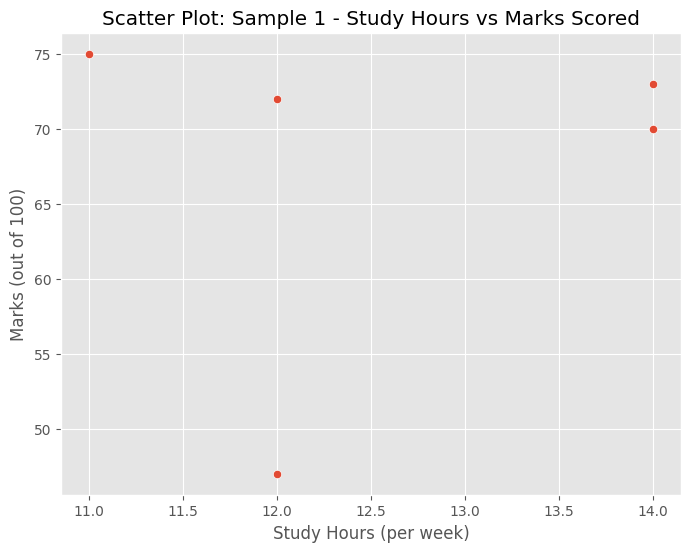

Sample 1 - Correlation between Study Hours and Marks: 0.14


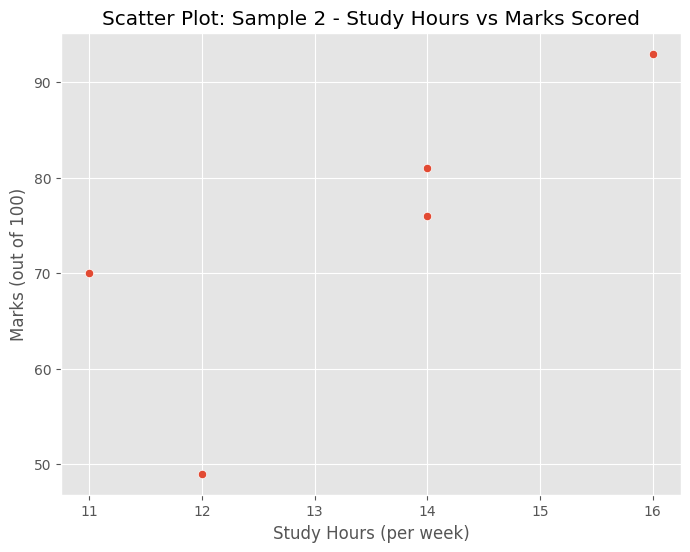

Sample 2 - Correlation between Study Hours and Marks: 0.79


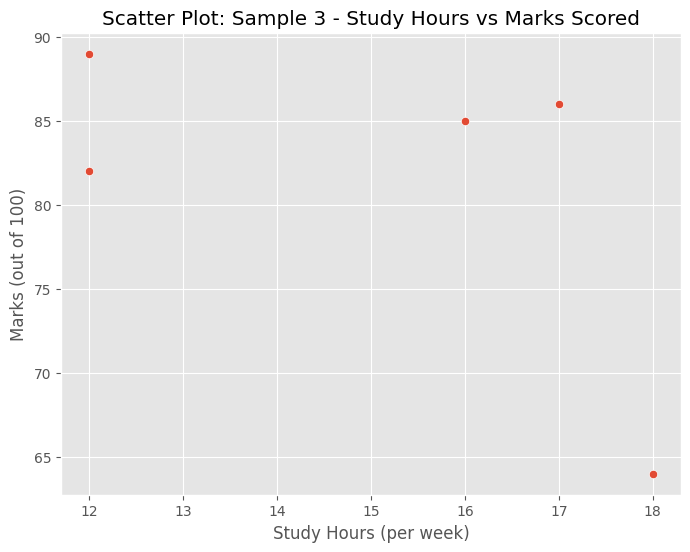

Sample 3 - Correlation between Study Hours and Marks: -0.57


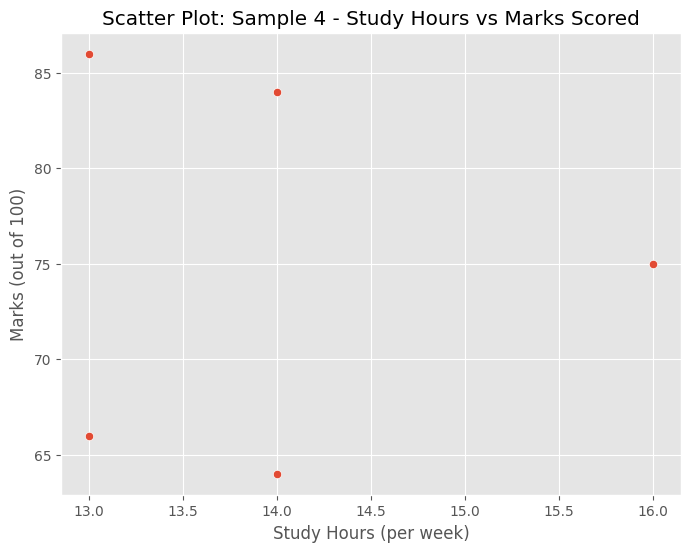

Sample 4 - Correlation between Study Hours and Marks: -0.04


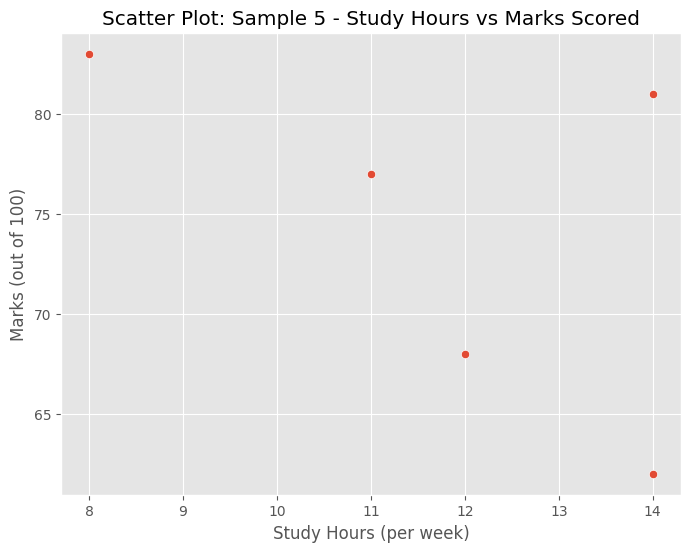

Sample 5 - Correlation between Study Hours and Marks: -0.55


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 5 samples: sample1, sample2, sample3, sample4, sample5
samples = [sample1, sample2, sample3, sample4, sample5]

# Loop through each sample
for i, sample in enumerate(samples, 1):
    # Scatter plot for each sample
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Study Hours (per week)', y='Marks (out of 100)', data=sample)
    plt.title(f'Scatter Plot: Sample {i} - Study Hours vs Marks Scored')
    plt.xlabel('Study Hours (per week)')
    plt.ylabel('Marks (out of 100)')
    plt.grid(True)
    plt.show()
    
    # Calculate the correlation coefficient for each sample
    correlation = sample['Study Hours (per week)'].corr(sample['Marks (out of 100)'])
    print(f"Sample {i} - Correlation between Study Hours and Marks: {correlation:.2f}")


Q.NO:11 Calculate the coefficient of correlation between study
hours and marks scored.

In [25]:
import pandas as pd

# Assuming you have 5 samples: sample1, sample2, sample3, sample4, sample5
samples = [sample1, sample2, sample3, sample4, sample5]

# Loop through each sample and calculate correlation
for i, sample in enumerate(samples, 1):
    correlation = sample['Study Hours (per week)'].corr(sample['Marks (out of 100)'])
    print(f"Sample {i} - Correlation between Study Hours and Marks: {correlation:.2f}")


Sample 1 - Correlation between Study Hours and Marks: 0.14
Sample 2 - Correlation between Study Hours and Marks: 0.79
Sample 3 - Correlation between Study Hours and Marks: -0.57
Sample 4 - Correlation between Study Hours and Marks: -0.04
Sample 5 - Correlation between Study Hours and Marks: -0.55


Q.NO:12 Find the regression lines of:
a. Marks Scored on Study Hours
b. Study Hours on Marks Scored

In [69]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have 5 samples (sample1, sample2, sample3, sample4, sample5)
samples = [sample1, sample2, sample3, sample4, sample5]

# Create a dictionary to store regression results
regression_results = {}

# Loop through each sample to calculate regression lines
for i, sample in enumerate(samples, 1):
    # Regression of Marks on Study Hours (Marks = m*Study Hours + b)
    slope_marks_on_study, intercept_marks_on_study, _, _, _ = stats.linregress(sample['Study Hours (per week)'], sample['Marks (out of 100)'])
    
    # Regression of Study Hours on Marks (Study Hours = m*Marks + b)
    slope_study_on_marks, intercept_study_on_marks, _, _, _ = stats.linregress(sample['Marks (out of 100)'], sample['Study Hours (per week)'])
    
    # Store the results in the dictionary
    regression_results[f'Sample {i}'] = {
        'Marks on Study Hours': {
            'Slope': round(slope_marks_on_study, 2),
            'Intercept': round(intercept_marks_on_study, 2),
            'Equation': f'Marks = {round(slope_marks_on_study, 2)} * Study Hours + {round(intercept_marks_on_study, 2)}'
        },
        'Study Hours on Marks': {
            'Slope': round(slope_study_on_marks, 2),
            'Intercept': round(intercept_study_on_marks, 2),
            'Equation': f'Study Hours = {round(slope_study_on_marks, 2)} * Marks + {round(intercept_study_on_marks, 2)}'
        }
    }

# Display the regression results
for sample, result in regression_results.items():
    print(f"{sample} - Marks on Study Hours: {result['Marks on Study Hours']['Equation']}")
    print(f"{sample} - Study Hours on Marks: {result['Study Hours on Marks']['Equation']}")
    print()


Sample 1 - Marks on Study Hours: Marks = 1.22 * Study Hours + 52.0
Sample 1 - Study Hours on Marks: Study Hours = 0.02 * Marks + 11.49

Sample 2 - Marks on Study Hours: Marks = 6.54 * Study Hours + -13.83
Sample 2 - Study Hours on Marks: Study Hours = 0.09 * Marks + 6.45

Sample 3 - Marks on Study Hours: Marks = -2.0 * Study Hours + 111.2
Sample 3 - Study Hours on Marks: Study Hours = -0.16 * Marks + 28.16

Sample 4 - Marks on Study Hours: Marks = -0.33 * Study Hours + 79.67
Sample 4 - Study Hours on Marks: Study Hours = -0.0 * Marks + 14.37

Sample 5 - Marks on Study Hours: Marks = -1.97 * Study Hours + 97.42
Sample 5 - Study Hours on Marks: Study Hours = -0.15 * Marks + 23.16



Q.NO:13 Use the regression line to predict the marks scored by a
student who studied for a given number of hours.

In [70]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have 5 samples (sample1, sample2, sample3, sample4, sample5)
samples = [sample1, sample2, sample3, sample4, sample5]

# Let's assume we want to predict the marks for a student who studied for 10 hours
study_hours_to_predict = 10  # Modify this value as needed

# Create a dictionary to store predictions
predictions = {}

# Loop through each sample to calculate regression lines and make predictions
for i, sample in enumerate(samples, 1):
    # Regression of Marks on Study Hours (Marks = m*Study Hours + b)
    slope_marks_on_study, intercept_marks_on_study, _, _, _ = stats.linregress(sample['Study Hours (per week)'], sample['Marks (out of 100)'])
    
    # Use the regression equation to predict the marks
    predicted_marks = slope_marks_on_study * study_hours_to_predict + intercept_marks_on_study
    
    # Store the predicted marks
    predictions[f'Sample {i}'] = {
        'Predicted Marks': round(predicted_marks, 2),
        'Regression Equation': f'Marks = {round(slope_marks_on_study, 2)} * Study Hours + {round(intercept_marks_on_study, 2)}'
    }

# Display the predictions for all samples
for sample, result in predictions.items():
    print(f"{sample} - {result['Regression Equation']}")
    print(f"Predicted Marks for {study_hours_to_predict} hours of study: {result['Predicted Marks']}")
    print()


Sample 1 - Marks = 1.22 * Study Hours + 52.0
Predicted Marks for 10 hours of study: 64.22

Sample 2 - Marks = 6.54 * Study Hours + -13.83
Predicted Marks for 10 hours of study: 51.57

Sample 3 - Marks = -2.0 * Study Hours + 111.2
Predicted Marks for 10 hours of study: 91.2

Sample 4 - Marks = -0.33 * Study Hours + 79.67
Predicted Marks for 10 hours of study: 76.33

Sample 5 - Marks = -1.97 * Study Hours + 97.42
Predicted Marks for 10 hours of study: 77.74



Q.NO:14 Test the significance of the correlation coefficient.

In [72]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have 5 samples (sample1, sample2, sample3, sample4, sample5)
samples = [sample1, sample2, sample3, sample4, sample5]

# Significance level (5%)
alpha = 0.05

# Create a dictionary to store the results
significance_results = {}

# Loop through each sample to calculate correlation and test its significance
for i, sample in enumerate(samples, 1):
    # Calculate the correlation coefficient
    correlation_coefficient, _ = stats.pearsonr(sample['Study Hours (per week)'], sample['Marks (out of 100)'])
    
    # Number of data points in the sample
    n = len(sample)
    
    # Compute the t-statistic
    t_stat = (correlation_coefficient * np.sqrt(n - 2)) / np.sqrt(1 - correlation_coefficient ** 2)
    
    # Degrees of freedom
    df = n - 2
    
    # Critical t value from t-distribution (two-tailed test)
    t_critical = stats.t.ppf(1 - alpha/2, df)
    
    # Test the hypothesis (if t_stat > t_critical, reject the null hypothesis)
    reject_null = abs(t_stat) > t_critical
    
    # Store the results
    significance_results[f'Sample {i}'] = {
        'Correlation Coefficient': round(correlation_coefficient, 2),
        't-statistic': round(t_stat, 2),
        'Critical t-value': round(t_critical, 2),
        'Reject Null Hypothesis': reject_null
    }

# Display the results
for sample, result in significance_results.items():
    print(f"{sample}:")
    print(f"  Correlation Coefficient: {result['Correlation Coefficient']}")
    print(f"  t-statistic: {result['t-statistic']}")
    print(f"  Critical t-value: {result['Critical t-value']}")
    print(f"  Reject Null Hypothesis: {'Yes' if result['Reject Null Hypothesis'] else 'No'}\n")


Sample 1:
  Correlation Coefficient: 0.14
  t-statistic: 0.25
  Critical t-value: 3.18
  Reject Null Hypothesis: No

Sample 2:
  Correlation Coefficient: 0.79
  t-statistic: 2.19
  Critical t-value: 3.18
  Reject Null Hypothesis: No

Sample 3:
  Correlation Coefficient: -0.57
  t-statistic: -1.2
  Critical t-value: 3.18
  Reject Null Hypothesis: No

Sample 4:
  Correlation Coefficient: -0.04
  t-statistic: -0.07
  Critical t-value: 3.18
  Reject Null Hypothesis: No

Sample 5:
  Correlation Coefficient: -0.55
  t-statistic: -1.14
  Critical t-value: 3.18
  Reject Null Hypothesis: No



Q.NO:15 Test the significance of the regression coefficient.

In [74]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have 5 samples (sample1, sample2, sample3, sample4, sample5)
samples = [sample1, sample2, sample3, sample4, sample5]

# Significance level (5%)
alpha = 0.05

# Create a dictionary to store the results
regression_significance_results = {}

# Loop through each sample to calculate regression coefficients and test their significance
for i, sample in enumerate(samples, 1):
    # Extract independent (study hours) and dependent (marks) variables
    X = sample['Study Hours (per week)']
    y = sample['Marks (out of 100)']
    
    # Perform linear regression (y = b0 + b1 * X)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    
    # Calculate the t-statistic for the regression coefficient (slope)
    n = len(sample)
    SE_b1 = std_err
    t_stat = slope / SE_b1
    
    # Degrees of freedom
    df = n - 2
    
    # Critical t value from t-distribution (two-tailed test)
    t_critical = stats.t.ppf(1 - alpha/2, df)
    
    # Test the hypothesis (if t_stat > t_critical, reject the null hypothesis)
    reject_null = abs(t_stat) > t_critical
    
    # Store the results
    regression_significance_results[f'Sample {i}'] = {
        'Regression Coefficient (b1)': round(slope, 2),
        't-statistic': round(t_stat, 2),
        'Critical t-value': round(t_critical, 2),
        'Reject Null Hypothesis': reject_null
    }

# Display the results
for sample, result in regression_significance_results.items():
    print(f"{sample}:")
    print(f"  Regression Coefficient (b1): {result['Regression Coefficient (b1)']}")
    print(f"  t-statistic: {result['t-statistic']}")
    print(f"  Critical t-value: {result['Critical t-value']}")
    print(f"  Reject Null Hypothesis: {'Yes' if result['Reject Null Hypothesis'] else 'No'}\n")


Sample 1:
  Regression Coefficient (b1): 1.22
  t-statistic: 0.25
  Critical t-value: 3.18
  Reject Null Hypothesis: No

Sample 2:
  Regression Coefficient (b1): 6.54
  t-statistic: 2.19
  Critical t-value: 3.18
  Reject Null Hypothesis: No

Sample 3:
  Regression Coefficient (b1): -2.0
  t-statistic: -1.2
  Critical t-value: 3.18
  Reject Null Hypothesis: No

Sample 4:
  Regression Coefficient (b1): -0.33
  t-statistic: -0.07
  Critical t-value: 3.18
  Reject Null Hypothesis: No

Sample 5:
  Regression Coefficient (b1): -1.97
  t-statistic: -1.14
  Critical t-value: 3.18
  Reject Null Hypothesis: No

